# 1. 'simple' bivariate linear regression

Before we get started lets import some libraries that we will definately need:

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

Lets begin with a simple example. We have two variables (x and y), each with some scores:

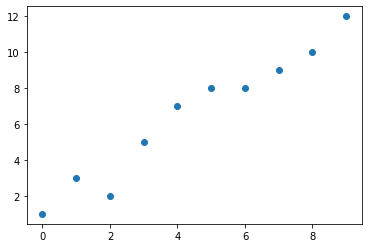

In [35]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([1,3,2,5,7,8,8,9,10,12])

plt.scatter(x,y)

We want to find the best possible straight line to represent these points. That's the challenge in this chapter.

## 1.1. Finding the best line 'by hand'
Any straight line can be written as:
$y = b_0 + b_1x$

The $b_0$ is known as the constant or intercept and the $b_1$ as the slope or gradient. Both $b_0$ and $b_1$ are sometimes also referred to as coefficients, and sometimes only $b_1$ is deemed a coefficient.

We want to choose $b_0$ and $b_1$ in such a way that it minimizes the total difference with the known points. However, not just the normal difference, but actually the squared difference.

We could keep on guessing but some smart people did some math for us and came up with two scary looking formulas:

\begin{equation*}
b_1=\frac{\bar{xy}-\bar{x}\times\bar{y}}{s_x^2}
\end{equation*}

And

\begin{equation*}
b_0=\bar{y}-\bar{x}\times b_1
\end{equation*}

A symbol with a bar on top, simply means average (mean). The $\bar{xy}$ is the mean of the $x$ values multiplied with $y$.

So lets calculate these for our example:

In [3]:
sx2 = x.var()
mxy = np.array(x*y).mean()
b1=(mxy-x.mean()*y.mean())/sx2
print("The gradient: ", b1)

The gradient:  1.1696969696969695


In [4]:
b0=y.mean()-b1*x.mean()
print("The constant: ",b0)

The constant:  1.2363636363636372


y = 1.24 + 1.17x

Now lets calculate our predicted values with these values:

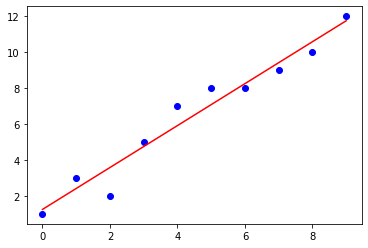

In [5]:
myPrediction = b0+b1*x

plt.scatter(x,y, color='blue')
plt.plot(x,myPrediction, color='red')

Not bad. 

## 1.2. How good is the best?

How well does our prediction actually work. We could of course simply determine the mean of the differences (the so-called residuals):

In [6]:
np.average(y-myPrediction)

2.220446049250313e-16

That doesn't seem right. We are not far off with the prediction, but this seems ridiculous low. The reason are the negative values, we simply want the difference in absolute values:

In [7]:
MAE = np.mean(np.absolute(y-myPrediction))
print("Mean Absolute Error (MAE): ", MAE)

Mean Absolute Error (MAE):  0.6169696969696968


This value is sometimes known as the Mean Absolute Error (MAE). As we saw in the previous session squaring in stead of absolute value is more common in statistics:

In [8]:
MSE = np.mean((y-myPrediction)**2)
print("Mean Squared Error (MSE): ", MSE)

Mean Squared Error (MSE):  0.5624242424242423


This is the Mean Squared Error (MSE) and as with the standard deviation, we can take the square root out of this to get the Root Mean Squared Error.

In [9]:
RMSE=MSE**(0.5)
print("Root Mean Squared Error (RMSE): ",RMSE)

Root Mean Squared Error (RMSE):  0.7499494932488736


However, more common to indicate how well a model is predicting the data a so-called coefficient of determination is calculated. This is usually written as $r^2$. You might recognize that $r$ from the previous session, it was the correlation coefficient. One way of calculating the determination coefficient is indeed by simply squaring the correlation coefficient.

The coefficient of determination will always be between 0 and 1. It is a percentage of the variance in the dependent variable ($y$) that is predictable from the independent variable(s) ($x$).

The formula for the correlation coefficient is usually given by:

\begin{equation*}
r=\frac{s_{xy}}{s_x\times s_y}
\end{equation*}

Here $s_{xy}$ is used to indicate the covariance, which in itself can be determined by:

\begin{equation*}
s_{xy}=\frac{\sum(x-\bar{x})\times(y-\bar{y})}{n-1}
\end{equation*}

I'm using here everywhere $s$ which usually is used for a so-called sample standard deviation. This divides by 'n'. However python more often uses $\sigma$ which is the population standard deviation. In this case it doesn't really matter since they actually will cancel each other out (the n-1 in the covariance will be cancelling the n-1 in the two standard deviations), and especially with big data using n or n - 1 will not lead to a big difference.

Okay, lets calculate that correlation coefficient and determination coefficient:

In [10]:
covxy = np.sum((x-x.mean())*(y-y.mean()))/x.size
sX = x.std()
sY = y.std()

cor = covxy/(sX*sY)
print('Pearson Correlation Coefficient: ',cor)

det = cor**2
print('Coefficient of Determination: ', det)

Pearson Correlation Coefficient:  0.9759805523748861
Coefficient of Determination:  0.9525380386139878


The calculation above for the determination coefficient shows the link between the correl and the determination coefficient. However there are other formulas that lead to the same result.

The determination coefficient is a percentage. So we can also look at the total variation in the original values:

\begin{equation*}
SS_{tot}=\sum(y-\bar{y})^2
\end{equation*}

Look at how much variation there is left:

\begin{equation*}
SS_{res}=\sum(\hat{y}-y)^2
\end{equation*}

In this equation $\hat{y}$ are the predicted values. We then divide the two we get the percentage of unexplained variance:

\begin{equation*}
\frac{SS_{res}}{SS_{tot}}
\end{equation*}

Since the determinaton coefficient is the percentage of explained variance, we can simply now find the determination coefficient using:

\begin{equation*}
r^2=1-\frac{SS_{res}}{SS_{tot}}
\end{equation*}

Using Python we can check this. A small trick makes the calculations a little easier. We already have the standard deviation of y, and then we can use that $SS_y=s_y^2\times n$. So we get:

In [11]:
1-np.sum((y-myPrediction)**2)/(sY**2*y.size)

0.952538038613988

Don't worry, you don't have to remember all those formulas. Numpy has you covered. It has a function to determine the correlation coefficient:

In [12]:
np.corrcoef(x,y)

array([[1.        , 0.97598055],
       [0.97598055, 1.        ]])

It returns a square matrix of 2x2. It shows the correlation coefficients between all possible pairs. So the 1 in the upper left corner is the correlation between x and x. The 0.97... is the correlation between x and y, and then in the next row we have the correlation between y and x, and finally between y and y. The diagonal will always be 1s.

Just to extract the correlation coefficient and get the determination coefficient is fairly easy now:

In [13]:
np.corrcoef(x,y)[0,1]**2

0.9525380386139878

Same as we had before, an extremely small difference which we'll consider a rounding error.

## 1.3. Using sklearn

Of course there have been others who have done this work for us. 
We could for example use sklearn (you'd have to install this first) and then you can import:

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

It does require to reshape our x variable:

In [15]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
xRes = x.reshape((-1,1))
yRes = y.reshape((-1,1))

print('shape of x:', x.shape)
print('shape after reshape:' ,xRes.shape)
xRes

shape of x: (10,)
shape after reshape: (10, 1)


array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

To perform the regression analysis and saving the predicted results we can use:

In [17]:
model = LinearRegression().fit(xRes,yRes)
yPred = model.predict(xRes)

As a reminder all the values we have calculated so far:

In [18]:
print('The slope (b1): ',b1)
print('The intercept (b0): ',b0)
print('Mean Absolute Error:', MAE)
print('Mean Squared Error: ', MSE)
print('Root Mean Squared Error: ', RMSE)
print('Coefficient of determination: ',det)

The slope (b1):  1.1696969696969695
The intercept (b0):  1.2363636363636372
Mean Absolute Error: 0.6169696969696968
Mean Squared Error:  0.5624242424242423
Root Mean Squared Error:  0.7499494932488736
Coefficient of determination:  0.9525380386139878


Now lets see and compare the result with using sklearn

In [19]:
b1V2=model.coef_[0]
print('The slope (b1): ',b1V2[0])
b0V2=model.intercept_
print('The intercept (b0): ',b0V2[0])
MAE2=metrics.mean_absolute_error(yRes,yPred)
print('Mean Absolute Error:', MAE2)
MSE2=metrics.mean_squared_error(yRes,yPred)
print('Mean Squared Error: ', MSE2)
RMSE2=metrics.mean_squared_error(yRes,yPred, squared=True)
print('Root Mean Squared Error: ', RMSE2)
det2=metrics.r2_score(yRes,yPred)
print('Coefficient of determination: ',det2)

The slope (b1):  1.1696969696969697
The intercept (b0):  1.2363636363636363
Mean Absolute Error: 0.6169696969696968
Mean Squared Error:  0.5624242424242423
Root Mean Squared Error:  0.5624242424242423
Coefficient of determination:  0.952538038613988


A very small difference with our 'manual' formula for b1 and b0. We'll leave that as a rounding error :-)

You might notice I've used an index for the b1 coefficient, since we can actually also have multiple variables to use for our prediction. More on this later.


### 1.3.2. Exercise
On Moodle you will find a file Soccer2019C.csv. We want to predict the Overall score of players solely based on their age. To load the data we can use pandas:

In [20]:
import pandas as pd

Once pandas is imported we can read a file as a pandas dataframe. If your file is in a separate folder 'data' we could use:

In [21]:
soccerDF=pd.read_csv('data/Soccer2019C.csv')

Once the data is loaded you can get a quick overview using:

In [22]:
soccerDF.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94,27,24,33,9,9,15,15,11,€228.1M
1,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96,33,28,26,6,11,15,14,8,€226.5M
2,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88,68,58,51,15,13,5,10,13,€196.4M
3,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91,34,27,22,11,12,6,8,8,€172.1M
4,15,211110,P. Dybala,24,https://cdn.sofifa.org/players/4/19/211110.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,94,Juventus,...,84,23,20,20,5,4,4,5,8,€153.5M


Your exercise is to find the linear regression equation to predict the Overall score, based on the age.

There are different ways you can do this:
1. Manually
2. Using the sklearn library
3. Using the statsmodels.api (not discussed yet)

You might have to convert the panda dataframe into a numpy array first. Try to find the regression equation with one (or even more to see if they all say the same).

Other things you could do if you think you're done....
* Add a visualisation
* Create a Python function to perform the manual calculations
* Find out which variable has the strongest determination coefficient to predict the Overall score
* Find out which two variables (one as predictor (x), one as predicted (y)) will have the strongest determination coefficient.


### 1.3.3. Answer

First convert the dataframe to an array:

In [39]:
x = soccerDF["Age"].to_numpy().reshape((-1,1))
y = soccerDF["Overall"].to_numpy().reshape((-1,1))

**The manual calculation:**

In [41]:
sx2 = x.var()
mxy = np.array(x*y).mean()
b1=(mxy-x.mean()*y.mean())/sx2
print("The coefficient (b1): ",b1)

b0=y.mean()-b1*x.mean()
print("The intercept (b0): ",b0)

The coefficient (b1):  0.670753275452498
The intercept (b0):  49.39888516650534


**Using sklearn:**

In [27]:
x=x.reshape((-1,1))
y=y.reshape((-1,1))

model = LinearRegression().fit(x,y)
b1=model.coef_[0]
print('The slope (b1): ',b1V2[0])

b0=model.intercept_
print('The intercept (b0): ',b0V2[0])

yPred = model.predict(x)

det=metrics.r2_score(y,yPred)
print('Coefficient of determination: ',det)

The slope (b1):  1.1696969696969697
The intercept (b0):  1.2363636363636363
Coefficient of determination:  0.20527180741220818


**Using statsmodels:**

In [26]:
import statsmodels.api as sm

In [27]:
X=soccerDF["Age"]
X=sm.add_constant(X)
model = sm.OLS(soccerDF["Overall"],X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     4690.
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        23:14:10   Log-Likelihood:                -58793.
No. Observations:               18159   AIC:                         1.176e+05
Df Residuals:                   18157   BIC:                         1.176e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.3989      0.250    197.374      0.000      48.908      49.889
Age            0.6708      0.010     68.482      0.000       0.652       0.690
==============================================================================
Omnibus:                      363.074   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              400.544
Skew:                           0.321   Prob(JB):                     1.05e-87
Kurtosis:                       3.341   Cond. No.                         140.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

My take on a function for linear regression:

In [28]:
def linearRegression(xVal, yVal):
    model = LinearRegression().fit(xVal,yVal)
    yPred = model.predict(xVal)
    b1V2=model.coef_[0]
    print('The slope (b1): ',b1V2)

    b0V2=model.intercept_
    print('The intercept (b0): ',b0V2[0])
    det2=metrics.r2_score(yVal,yPred)
    print('Coefficient of determination: ',det2)

Now to find out which variable has the highest correlation. Micha is a big fan of seaborn and liked to visualize this by creating all scatterplots between all possible pairs of variables: 

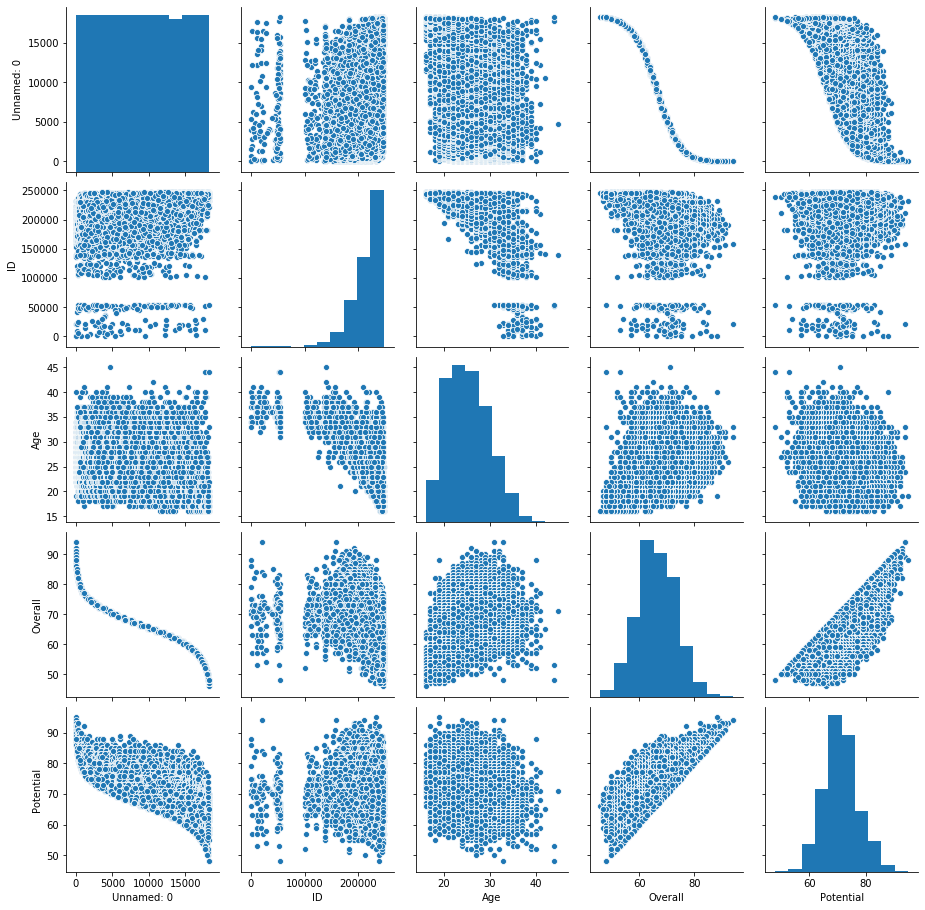

In [29]:
import seaborn as sns
soccerLim =soccerDF.iloc[:,0:10] # Showing this for all variables will simply take too much time for now, so just to get an example limit the data
sns.pairplot(soccerLim) # Show the scatterplots of each possible pair of variables

The full version would be a bit impracticle. He also used a heat map. Looks also nice:

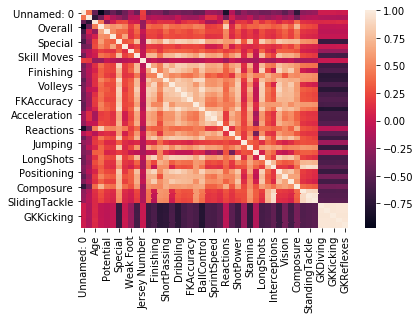

In [30]:
sns.heatmap(soccerDF.corr()) # show a heatmap which columns are corrolated.

I'm more of a numbers guy myself. We can generate a so-called correlation matrix using our pandas dataframe.

In [31]:
corrMatrix=soccerDF.corr(method='pearson')
corrMatrix.head()

,Unnamed: 0,ID,Age,Overall,Potential,ValueInK,Special,International Reputation,Weak Foot,Skill Moves,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Unnamed: 0,1.000000,0.416108,-0.455707,-0.972796,-0.633444,-0.442429,-0.596913,-0.413322,-0.204026,-0.415672,...,-0.337899,-0.716173,-0.280829,-0.248564,-0.220034,0.027757,0.027026,0.030654,0.019842,0.025610
ID,0.416108,1.000000,-0.739162,-0.417354,0.046577,-0.118782,-0.231366,-0.356191,-0.075784,-0.056914,...,-0.140657,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778
Age,-0.455707,-0.739162,1.000000,0.453069,-0.252281,0.055641,0.236875,0.253765,0.059867,0.027649,...,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313
Overall,-0.972796,-0.417354,0.453069,1.000000,0.661180,0.560734,0.607236,0.499491,0.212015,0.414463,...,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276
Potential,-0.633444,0.046577,-0.252281,0.661180,1.000000,0.524015,0.384598,0.372993,0.162346,0.354290,...,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341


To determine the one with the best determination coefficient, we simply square the results:

In [32]:
detMatrix=corrMatrix**2
detMatrix.head()

,Unnamed: 0,ID,Age,Overall,Potential,ValueInK,Special,International Reputation,Weak Foot,Skill Moves,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Unnamed: 0,1.000000,0.173146,0.207669,0.946332,0.401251,0.195743,0.356305,0.170835,0.041627,0.172783,...,0.114175,0.512904,0.078865,0.061784,0.048415,0.000770,0.000730,0.000940,0.000394,0.000656
ID,0.173146,1.000000,0.546360,0.174185,0.002169,0.014109,0.053530,0.126872,0.005743,0.003239,...,0.019784,0.147819,0.012144,0.007384,0.004680,0.011150,0.012354,0.011375,0.013983,0.011189
Age,0.207669,0.546360,1.000000,0.205272,0.063646,0.003096,0.056110,0.064397,0.003584,0.000764,...,0.019470,0.152899,0.020397,0.014339,0.010627,0.010257,0.011325,0.011017,0.013549,0.010673
Overall,0.946332,0.174185,0.205272,1.000000,0.437159,0.314422,0.368736,0.249491,0.044951,0.171780,...,0.116574,0.529482,0.082085,0.063821,0.049645,0.000673,0.000628,0.000863,0.000312,0.000542
Potential,0.401251,0.002169,0.063646,0.437159,1.000000,0.274591,0.147915,0.139124,0.026356,0.125521,...,0.050302,0.193607,0.026504,0.020611,0.016636,0.002856,0.002989,0.003488,0.002766,0.002845


Then replace the 1's with a 0 (to avoid getting the diagonal), and determine the maximum:

In [33]:
detMatrix = detMatrix.replace(1,0)
maxRsquare=detMatrix.values.max()
maxRsquare

0.9499600357696576

Okay, uhm but between which two is this:

In [34]:
for column in detMatrix:
    if detMatrix[column].values.max()==maxRsquare:
        print(column)

StandingTackle
SlidingTackle


Great, lets check:

In [35]:
X=soccerDF["StandingTackle"]
X=sm.add_constant(X)
model = sm.OLS(soccerDF["SlidingTackle"],X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SlidingTackle   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 3.447e+05
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        23:14:19   Log-Likelihood:                -54107.
No. Observations:               18159   AIC:                         1.082e+05
Df Residuals:                   18157   BIC:                         1.082e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0232      0.085     -0.272      0.786      -0.191       0.144
StandingTackle     0.9578      0.002    587.106      0.000       0.955       0.961
==============================================================================
Omnibus:                     2790.714   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12353.687
Skew:                          -0.694   Prob(JB):                         0.00
Kurtosis:                       6.795   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<center><strong>BACK TO THE SLIDES</strong></center>

# 2. Multiple Linear Regression

So you have seen how linear regression works. Notice that we only used one variable (x) to predict another variable (y). The variable we are trying to predict (y) is known as the '**dependent variable**' or '**outcome variable**', while the variable used to predict this is the '**independent variable**' or '**predictor**', or '**covariate**', or '**feature**'. Sigh, what a terminology.

## 2.1. Basics of Multiple Linear Regression

Instead of trying to predict one variable on just one thing, we can of course also try to predict one variable based on multiple variables. The concept remains the same, but there will be a few additional worries.

The multiple linear regression equation can be written as you probably suspect:

\begin{equation*}
\hat{y}=b_0+b_1 x_1+b_2 x_2+...+b_n x_n
\end{equation*}

Okay, so a new example. We have some interest rates, unemployment rates and want to use those to predict a stock index. Here's the data:

In [36]:
Int_Rate = np.array([2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75]).reshape((-1,1))
Unemp_Rate = np.array([5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1]).reshape((-1,1))
Stock_Index = np.array([1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]).reshape((-1,1))

First lets look how well each of the two independent variables (Int_Rate and Unemp_Rate) would predict the Stock_Index:

In [37]:
linearRegression(Int_Rate.reshape(-1,1), Stock_Index)

The slope (b1):  [564.20389249]
The intercept (b0):  -99.46431881371655
Coefficient of determination:  0.8757089547891359


In [38]:
linearRegression(Unemp_Rate.reshape(-1,1), Stock_Index)

The slope (b1):  [-588.96207585]
The intercept (b0):  4471.339321357287
Coefficient of determination:  0.850706607677214


Each of them doesn't appear to be bad. Now to use both of them to predict the Stock Index, we need to use the 'hstack' function of numpy:

In [39]:
multiX=np.hstack((Int_Rate,Unemp_Rate))

In [40]:
linearRegression(multiX, Stock_Index)

The slope (b1):  [ 345.54008701 -250.14657137]
The intercept (b0):  1798.4039776258555
Coefficient of determination:  0.8976335894170215


As you might notice the determination coefficient is now better than the two seperate ones.

Unfortunately it isn't that simple. 

## 2.2. Adjusted Determination Coefficient

Adding any extra variable will always increase the $r^2$ (an example can be found at https://blog.minitab.com/blog/adventures-in-statistics-2/multiple-regession-analysis-use-adjusted-r-squared-and-predicted-r-squared-to-include-the-correct-number-of-variables). One thing therefor is to adjust the the $r^2$.

This can be done using the following formula:

\begin{equation*}
\bar{r}^2=1-(1-r^2)\frac{n-1}{n-p-1}
\end{equation*}

In this equation $n$ is the sample size, and $p$ is the number of independent variables (so not counting the constant).

In [41]:
multiModel = LinearRegression().fit(multiX, Stock_Index)
yPred = multiModel.predict(multiX)
det=metrics.r2_score(Stock_Index,yPred)

adjDet=1-(1-det)*(Stock_Index.shape[0]-1)/(Stock_Index.shape[0]-multiX.shape[1]-1)

print(adjDet)

0.8878844074567379


Alright, still better than the best one single but not as much anymore than before.

Another package (api in this case) that can produce a lot more information is the 'statsmodels' api. You will first have to install it using: conda install -c conda-forge statsmodels

Then you can use it as shown below:

In [42]:
import statsmodels.api as sm

In [43]:
newX=sm.add_constant(multiX) #add the constant
newModel=sm.OLS(Stock_Index,newX).fit()
newPred=newModel.predict(newX)
newModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Mon, 18 May 2020   Prob (F-statistic):           4.04e-11
Time:                        23:14:19   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1798.4040    899.248      2.000      0.059     -71.685    3668.493
x1           345.5401    111.367      3.103      0.005     113.940     577.140
x2          -250.1466    117.950     -2.121      0.046    -495.437      -4.856
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.530
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.551
Skew:                          -0.612   Prob(JB):                        0.461
Kurtosis:                       3.226   Cond. No.                         394.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<center><strong>BACK TO THE SLIDES</strong></center>

## 2.3. Multiple Independent Variables
There are two other issues when dealing with multiple independent variables. One is if you start looking for which has the biggest impact, and something known as multicolinearity.

### 2.3.1. Standardized Coefficients
If we look at the example result we had the following coefficients:

In [44]:
b0=multiModel.intercept_
print('The intercept (b0): ',b0[0])
    
b1=multiModel.coef_[0][0]
print('b1: ',b1)

b2=multiModel.coef_[0][1]
print('b2: ',b2)


The intercept (b0):  1798.4039776258555
b1:  345.54008701056546
b2:  -250.14657136938072


Our equation would then be:
\begin{equation*}
\hat{y}=1798.40+345.54\times \text{Int_rate} -250.15\times\text{Unemp_Rate}
\end{equation*}

This might suggest that *Int_Rate* has a bigger effect than *Unemp_Rate* just because 345.54 > 250.15.

This would be an unfair comparison though. If I were to predict a grade of lets say Mathematics. These were on a scale of 0 to 100. I'm going to predict the Math grades, based on the grades for UML (scale of 0 to 10) and the grades for ITSM (scale of 0 to 100). Without any calculation I'd estimate that the UML grade will have to get multiplied by 10 to rescale it to the 0-100 scale, so the coefficient for UML will probably be higher than the one for ITSM.

To accound for this, there is something known as '**standardized coefficients**', these take the scale of the variables used into consideration.

To get them, we need to convert the data into so-called z-scores, for which we can use scipy:

In [45]:
from scipy.stats.mstats import zscore
sm.OLS(zscore(Stock_Index), zscore(multiX)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.888
Method:                 Least Squares   F-statistic:                              96.46
Date:                Mon, 18 May 2020   Prob (F-statistic):                    1.29e-11
Time:                        23:14:19   Log-Likelihood:                         -6.7042
No. Observations:                  24   AIC:                                      17.41
Df Residuals:                      22   BIC:                                      19.76
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5731      0.180      3.176      0.004       0.199       0.947
x2            -0.3917      0.180     -2.171      0.041      -0.766      -0.017
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.530
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.551
Skew:                          -0.612   Prob(JB):                        0.461
Kurtosis:                       3.226   Cond. No.                         5.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now note that the coef for x1 is 0.5731 and for x2 is -0.3917. Comparing the absolute values of these suggest that x1 (Int_Rate) has a bigger impact than Unemp_Rate.

<center><strong>BACK TO THE SLIDES</strong></center>

## 2.3.2. Multicollineairy

Multicollinearity means that one or more of the independent variables (one of the x's) can actually be very accuratly predicted by the other independent variables. If this is the case we can simplify our model by removing that variable.

There are a few different ways of detecting multicolinearity (see https://en.wikipedia.org/wiki/Multicollinearity#Detection_of_multicollinearity as a nice starting point). One of them is to use so called Variance Inflation Factors. If this is above 10 you can probably better leave the variable out.

We won't go into the details of the calculation. Here's how statsmodels can help:

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
[variance_inflation_factor(newX, j) for j in range(newX.shape[1])]

[3897.8893722805465, 6.999417339962709, 6.999417339962709]

Note that we used *newX* because we are including the constant in our model (which actually is another choice to consider in regression analysis).

The first one we can ignore, it is the VIF of the constant and doesn't have a clear interpretation.

The VIF of the other two variables are the same, since the only comparison we are doing is between those two variables. If we'd had three or more variables to predict it would have been different.

It is below 10 though, so we're good.

<center><strong>BACK TO THE SLIDES</strong></center>

# 3 Training Validation and Holdout
(this line of text was from Micha)
  
Let’s assume you will train a model. Before starting you have to split your data that you can evaluate if your model is working and preforms well.   
Methods for evaluating a trained “model’s” performance are divided into 2 categories: 
- **Holdout** 
- **Cross-validation**  

Both methods are using a test set (This is data you did not use before) to evaluate model performance. It’s not recommended to use data where you already trained with. Then you will get something back like; We from Microsoft Cloud advice to use Azure. It does not sound like an objective advice. The model recognize the training set and predict you the answers it trained on. This phenomenon is known as overfitting. It like cheating on your exam, when you have already the results and you only have to copy the results on a new paper.  

### Holdout 

The purpose of holdout evaluation is to test a model on different data than it was trained on. This provides an **unbiased** estimate of learning performance. What “bias ” is will be explained later.

In this method, the dataset is randomly divided into three subsets:

-	**Training** set is a subset of the original dataset.
-	**Validation** set is a subset of the dataset used to assess the performance of the model built in the training phase. It provides a test platform for optimizing the model . 
-	**Test** or Holdout set, or “unseen” data, is a subset of the dataset used to assess the likely future performance of a model. 

The holdout is known about speed performance , simplicity, and flexibility. However, this technique is often associated with high **variability** since differences in the training and test dataset can result in meaningful differences in the estimate of accuracy. What “variance” is will be explained later.

We can use sklearn to set a sample of our data as test data, and part as validation. Similar as you've seen in Computer Vision. Lets use the soccer data as an example.

First, just to be sure, reload the data and now set our independent variable to just all of them:

In [48]:
soccerDF=pd.read_csv('data/Soccer2019C.csv')

X = soccerDF[['Age', 'Potential', 'ValueInK', 
       'Special', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]
y = soccerDF['Overall']

Then load the train_test_split option from sklearn:

In [49]:
from sklearn.model_selection import train_test_split

And split the data in a test and train set.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

The test_size parameter is a proportion of the original dataset to be selected as the test set.

The random_state parameter sets the random seed to a specific state so we can replicate the results if needed.

We can verify if the test set is indeed 40% of the original:

In [51]:
print(0.4*X.shape[0])
X_test.shape[0]

7263.6


7264

Lets create our model. Make sure to use the training data!

In [52]:
myModel=LinearRegression().fit(X_train,y_train) # To train the model. Only fit the training data. 

Get a clue about the coefficients and the constant/intercept:

In [53]:
print('Intercept:', myModel.intercept_)
print('Coefficients',myModel.coef_)
X_train.columns

Intercept: -11.340015803145903
Coefficients [ 5.04956843e-01  4.81898044e-01  1.01883451e-04  5.47727097e-02
 -3.17810116e-01 -2.51235267e-02  8.41271482e-01 -4.60894395e-02
 -4.23072710e-02 -4.84006262e-03 -1.49452296e-02 -5.69332095e-02
 -5.27856479e-02 -5.28115605e-02 -5.39747346e-02 -5.92955353e-02
  1.82096488e-02 -3.38567521e-02 -2.95795457e-02 -5.39326908e-02
  8.76544896e-02 -7.25464059e-02 -3.92701778e-02 -5.31535393e-02
 -2.42206859e-02 -2.78247136e-02 -5.93162150e-02 -5.61648923e-02
 -5.42947930e-02 -7.93858348e-02 -7.28440593e-02 -6.41660587e-02
  3.94715198e-02 -4.04688457e-02 -3.90497975e-02 -6.74368373e-02
 -5.89588650e-03 -1.58018617e-02 -3.49574912e-02 -3.34968404e-02
  1.33782475e-03]


Index(['Age', 'Potential', 'ValueInK', 'Special', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

Hm, that doesn't look very user-friendly. Panda to the rescue:

In [54]:
coeff_df = pd.DataFrame(                                  # creating a dataframe 
                        myModel.coef_,                    # myModel.coef_ as the data
                        X.columns,                        # X.columns as the index
                        columns=['Coefficient'])          # column name is 'Coefficient' 
                                                                    
coeff_df.head(10)

,Coefficient
Age,0.504957
Potential,0.481898
ValueInK,0.000102
Special,0.054773
International Reputation,-0.317810
Weak Foot,-0.025124
Skill Moves,0.841271
Crossing,-0.046089
Finishing,-0.042307
HeadingAccuracy,-0.004840


One big question is of course if all these coefficients are really needed.

We could look at the standardized coefficients, and perhaps the Variance Inflation Factors. Lets use another technique: Permutation importance, or 'Mean Decrease Accuracy', which actually uses a Random Forests approach (https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html).

Tricky stuff, so import a package to do the work for us: eli5.

In [55]:
import eli5 
from eli5.sklearn import PermutationImportance

C:\Users\Peter\anaconda3\envs\Data Science - P37 build\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Peter\anaconda3\envs\Data Science - P37 build\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


Now for the results:

In [56]:
perm = PermutationImportance(myModel, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
9.2430 ± 0.1650,Special
0.3682 ± 0.0117,Potential
0.2359 ± 0.0036,Age
0.0999 ± 0.0035,Positioning
0.0849 ± 0.0028,SlidingTackle
0.0524 ± 0.0019,LongShots
0.0516 ± 0.0030,Interceptions
0.0431 ± 0.0018,Balance
0.0426 ± 0.0015,Vision
0.0409 ± 0.0021,Penalties


As Micha said: "Again, this is a model. Always understand what you see. The feature "Special" have a big impact on the "Overall" score. But if you do not know how the "Special" feature is calculated. Be careful with predictions. It theory it is posible that other features have a major impact if "Special" is not linair. Always consult a soccer speciallist that can motivate the features."

So, how did our model perform?

Well, first store the predicted values:

In [57]:
predictions = myModel.predict(X_test)

We can now visualize how the predicted values perform against the tested results:

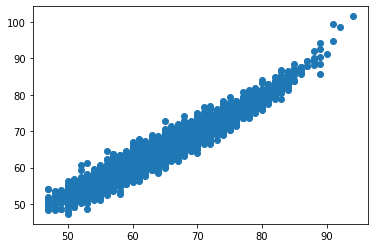

In [58]:
plt.scatter(y_test,predictions)

Or look at the residuals (the difference between the two):

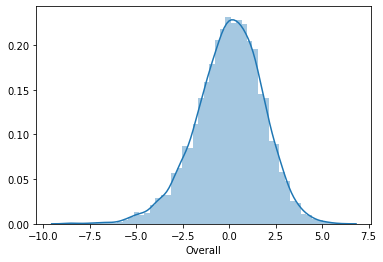

In [59]:
sns.distplot((y_test-predictions),bins=50)

Or use a metric: (if I'm not mistaken, this is the determination coefficient r-square)

In [60]:
myModel.score(X_test, y_test)

0.9318741039341933

As mentioned in the beginning this holdout technique is one of the two main types to split your data. The other is K-Fold.

For more info on K-Fold see:

https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6 and https://medium.com/datadriveninvestor/k-fold-cross-validation-6b8518070833


<center><strong>BACK TO THE SLIDES</strong></center>

# 4. Final remarks
A few loose ends...

## 4.1. Missing values
In the bits and pieces I got from Micha there was also something on Missing values. A useful library for this is the missingno library:

In [61]:
import missingno as msno

You can create a quick overview of the count of different variables:

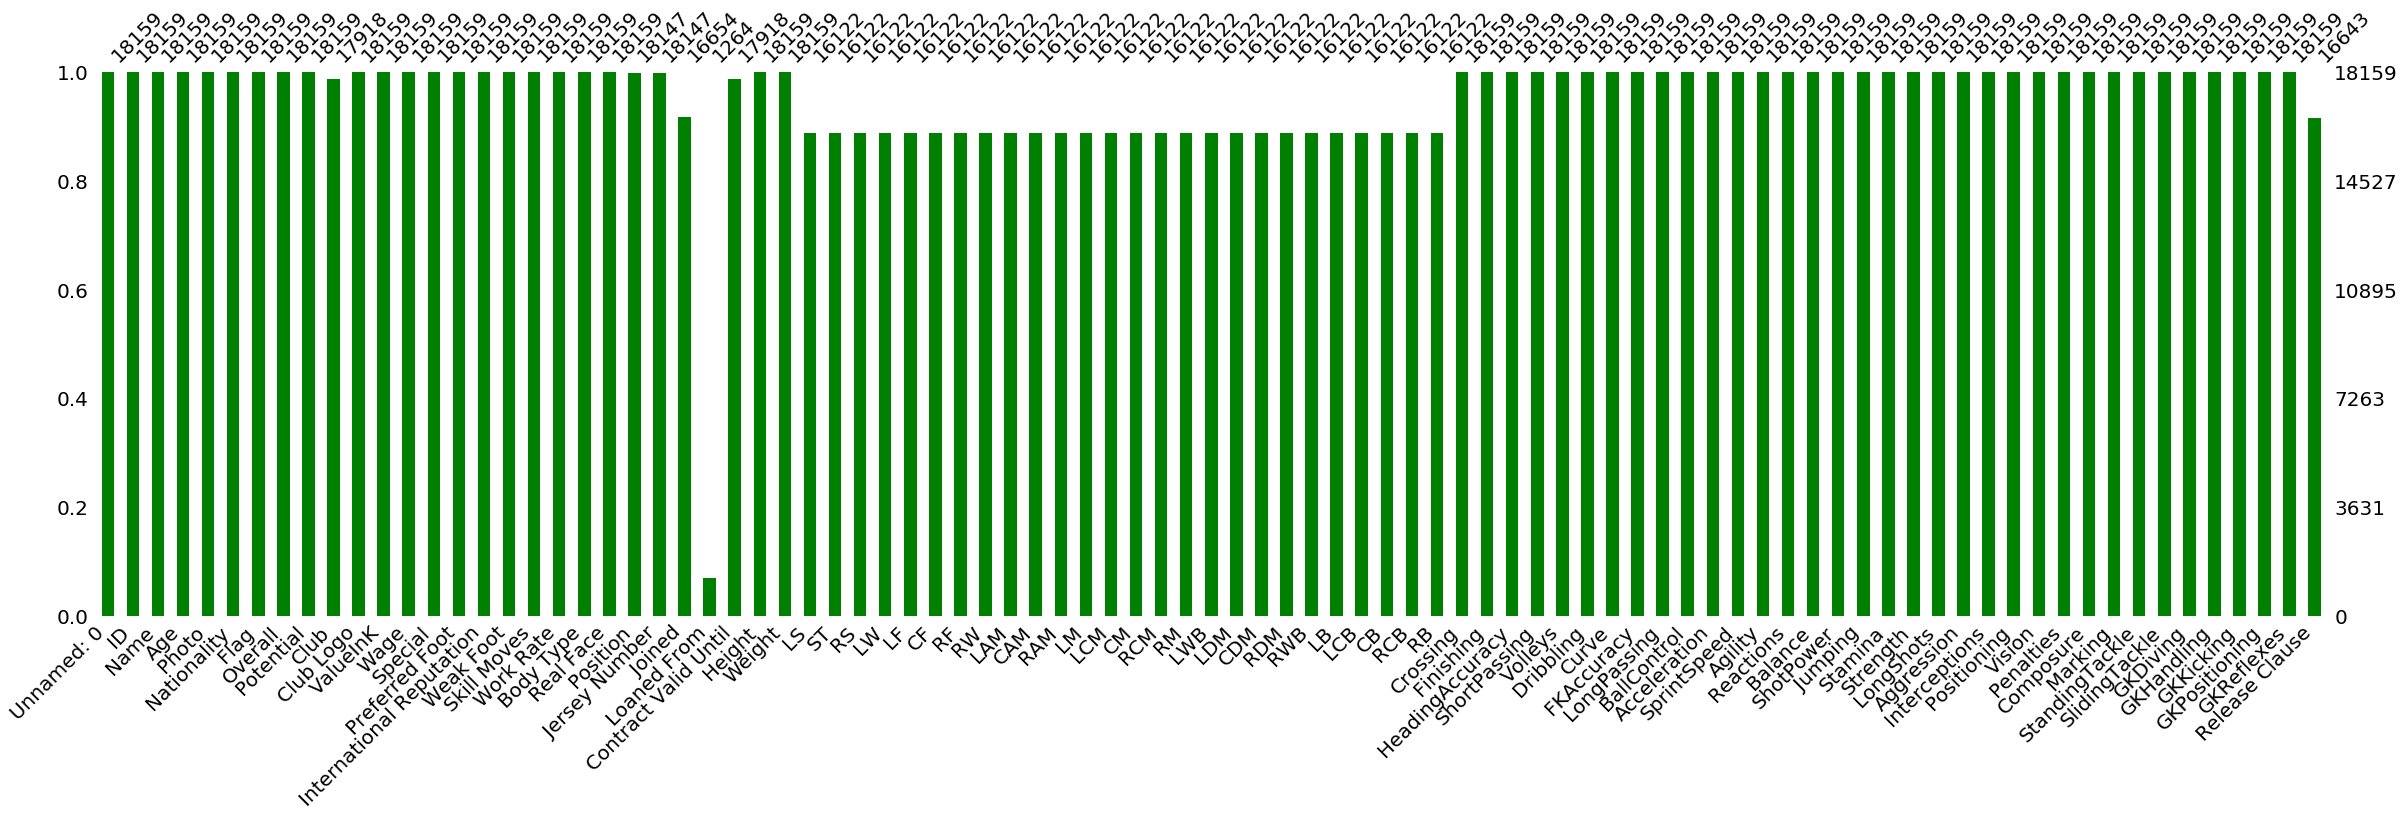

In [62]:
msno.bar(soccerDF.sample(18159),(40,10),fontsize=20,color=(0,0.5,0),labels=True)

The 'Loaned From' appears to have a very low count.

We can also see the results more in a matrix style:

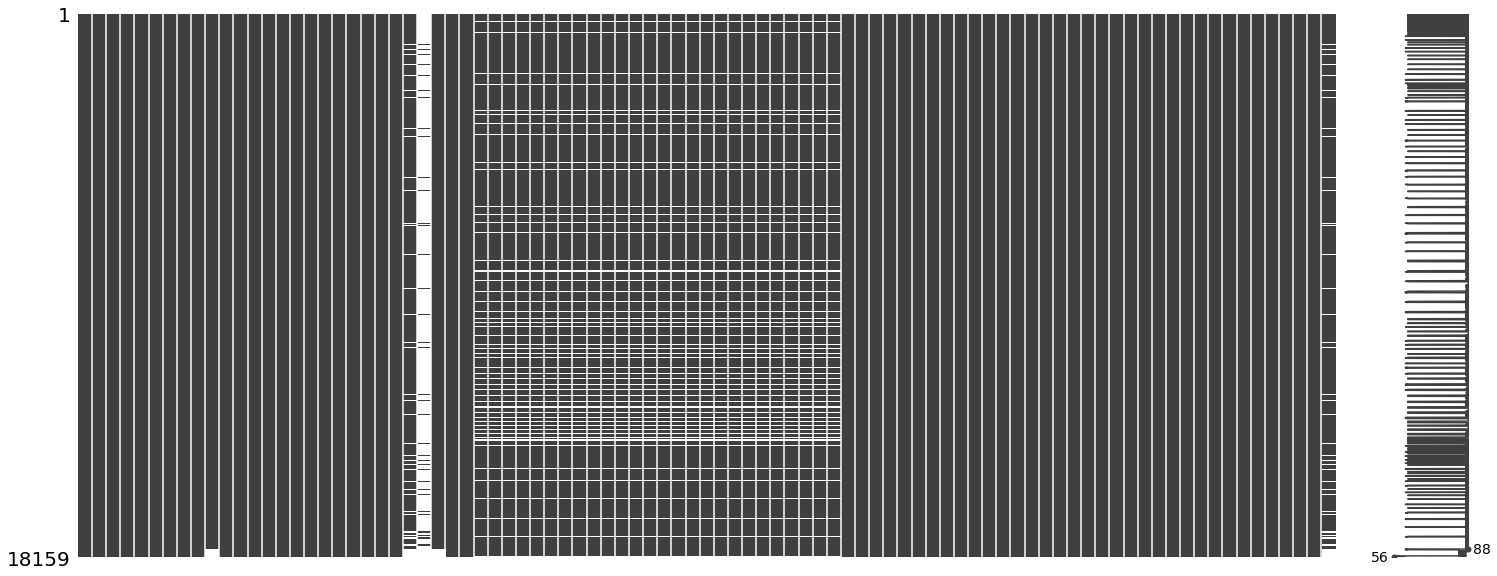

In [63]:
msno.matrix(soccerDF)

And we can of course do some more fancy things with the colors, etc.

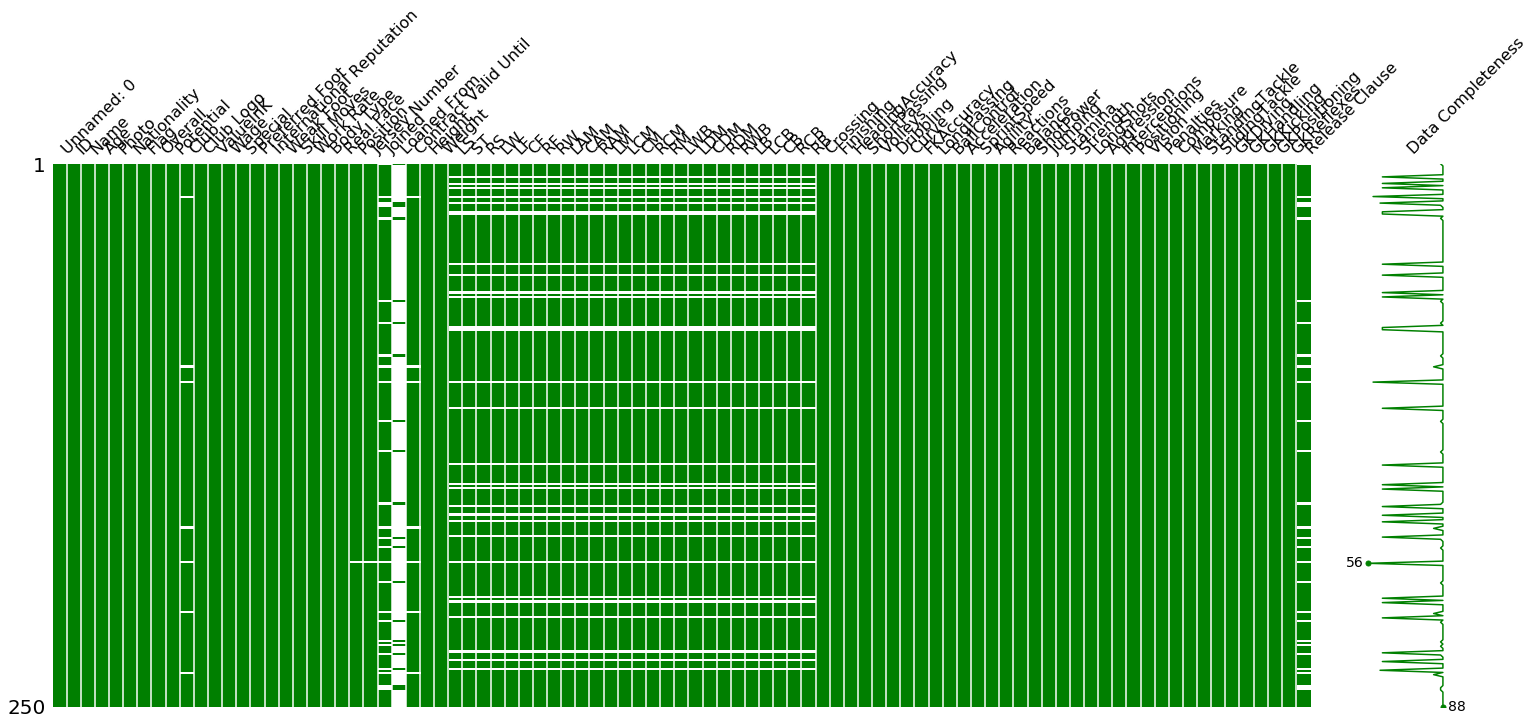

In [64]:
msno.matrix(soccerDF.sample(250),color=(0,0.5,0),labels=True)

A small side note. We have a few columns that are links, or not named at all. We can remove those using 'drop':

In [65]:
soccerDF.drop(['Unnamed: 0','Photo','Flag','Club Logo'],axis=1,inplace=True)

In [66]:
soccerDF.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'ValueInK', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKick

## Some lose ends from Micha

Below something I got from Micha, but not really sure what he wanted us to do with it.
__________________________________________________

The cheat sheet is here!

https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf

(0, 100)

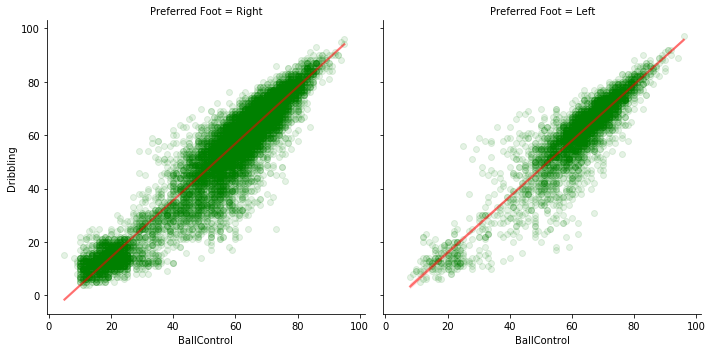

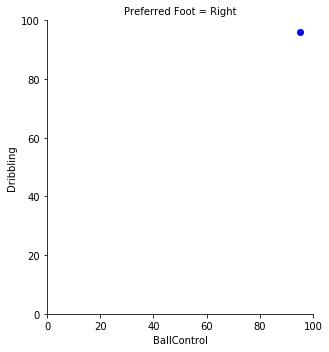

In [67]:
# Who are the better soccer players? Left feed or right feed?
sns.lmplot(
            x = 'BallControl', 
            y = 'Dribbling', 
            data = soccerDF,col = 'Preferred Foot',
            scatter_kws = {'alpha':0.1,'color':'green'},
            line_kws={'alpha':0.5,'color':'red'})

playerName = "Neymar Jr"                                 # "L. Messi", "Neymar Jr", "Isco", "Cristiano Ronaldo"
dPlayer = soccerDF[soccerDF['Name']== playerName]
sns.lmplot(
            x = 'BallControl', 
            y = 'Dribbling', 
            data = dPlayer,col = 'Preferred Foot',
            scatter_kws = {'alpha':1,'color':'blue'})
plt.xlim (0,100)
plt.ylim (0,100)
